No handles with labels found to put in legend.


0.0


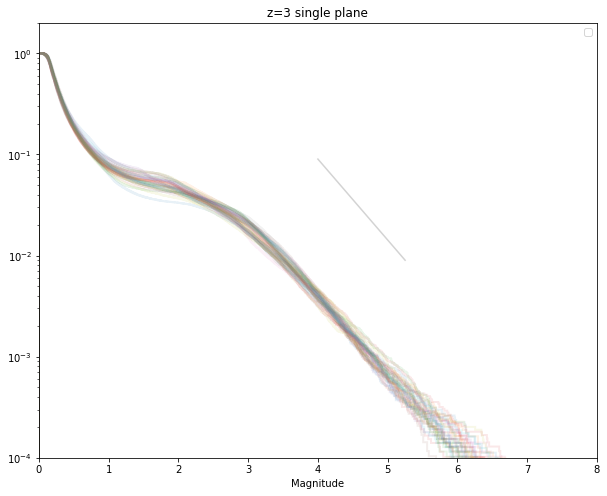

In [7]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

# matplotlib.rcParams.update({'font.size': 22})
muavg = [0 for n in range(103041)]
muavgsq= [0 for n in range(103041)]


# print(mu)
run_num=40
n_bins = np.linspace(0, 8.0, num=1000)
j=0
fig, ax = plt.subplots(figsize=(10, 8))
for filename in glob.glob('/Users/agnivaghosh/Downloads/Lensing/magnifications/data/A370/hff/range_z9/mag*.dat'):
    j=j+1
#     print(j)
    mag= np.genfromtxt(filename, dtype=(
        {'names': ['iz','z','ix', 'iy','im' ,'xs','ys','mag','vol','magpervol'], 
         'formats': ['f8','f8','f8','f8','f8', 'f8', 'f8','f8', 'f8', 'f8']}))
#     nparray=mag['mag']
#     nparray[nparray == 0] = np.nan
    
    mag['mag'][0]=1
    nparray=mag['mag']
    muavg=muavg+nparray
    muavgsq=muavgsq+nparray*nparray
    nparray[nparray == 0] = np.nan
    m=2.5*np.log10(nparray)
    
    
    
#     print(len(m))
    
    
    
    
    ax.hist(m, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,alpha=0.1)

muavg[muavg == 0] = np.nan
muavgsq[muavgsq == 0] = np.nan
muavg=abs(2.5*np.log10(muavg/run_num))
muavgsq=2.5*np.log10(muavgsq/run_num)
# for i in range(len(muavg)):
#         if muavg[i]==0 :
#             print(i)

# ax.hist(muavgsum, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Plummers Averaged')
# ax.hist(muavg, n_bins, density=True, histtype='step',cumulative=-1,linewidth=2,label='Grale Runs Averaged')
ax.plot([4,5.25],[0.09,0.009],color="LightGray")
# print(muavgsq)
print(min(muavg))
# plt.grid(True)
plt.axis([0, 8, 0.0001, 2])
plt.yscale('log')
ax.set_title('z=3 single plane')
ax.set_xlabel('Magnitude')
# plt.xscale('log')
# ax2.set_title('IrtyshII')
# ax2.set_xlabel('Fractional Mass Dispersion')
ax.legend(loc='upper right')
plt.show()
# fig.savefig('z3_ind_runs.png', dpi=300)

<ipython-input-8-25d919e5dda4>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax.pcolormesh(Y,X,Z,vmax=6,cmap='plasma')


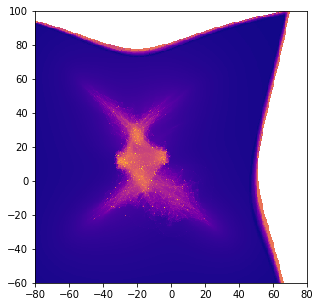

In [8]:
x = np.linspace(-60, 100, 321)
y = np.linspace(-80, 80, 321)
X, Y = np.meshgrid(x, y)
Z=(abs(muavg)).reshape(321,321)

fig, ax = plt.subplots(ncols=1,figsize=(18, 5))

ax.pcolormesh(Y,X,Z,vmax=6,cmap='plasma')
ax.set_aspect('equal')

In [25]:
103041**0.5

321.0

In [1]:
import glob
import sys
import numpy as np
import operator
from scipy import optimize
from scipy import stats
from scipy.ndimage import gaussian_filter
import math
from scipy.interpolate import RegularGridInterpolator

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc
import os

c = 2.9979e10 #speed of light
G = 6.6726e-8 #Gravitational constant in cgs
m_sol = 1.989e33 #Solar mass in grams
rad_arcs = 206264.806 #Conversion factor for going from radians to arcseconds

path = '/Users/agnivaghosh/Downloads/Lensing/magnifications/data/A370/scratch/A370_hff/'
os.chdir(path)


plummers = np.genfromtxt('invX_plummers.dat', dtype=(
    {'names': ['x', 'y', 'width', 'mass'], 'formats': ['f8', 'f8', 'f8', 'f8']}))

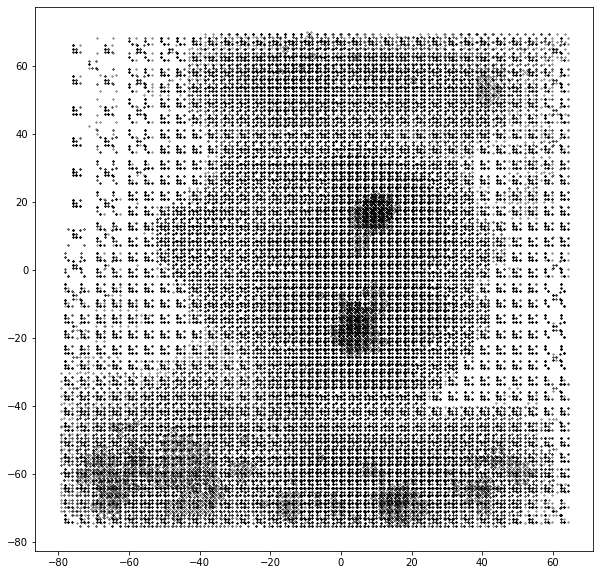

In [77]:
plt.subplots(figsize=(10,10))
plt.scatter(-plummers['x'],plummers['y'],s=2,c='black',alpha=0.4,marker='x')
# plt.colorbar()

In [159]:
x = np.linspace(-100, 100, 200)
y = np.linspace(-100, 100, 200)
X, Y = np.meshgrid(x, y)

kappa=np.zeros(len(x)*len(y))
k=0
for i in range(len(x)):
    for j in range(len(y)):
        print(k,end='\r')
        kappa[k]=np.sum(plummers['mass'][:]*((plummers['x'][:]-x[i])**2+(plummers['y'][:]-y[j])**2)/((plummers['x'][:]-x[i])**2+(plummers['y'][:]-y[j])**2+plummers['width'][:]**2))
        k+=1



<ipython-input-162-ac8c33e20c94>:5: UserWarning: The following kwargs were not used by contour: 'shading'
  im=ax.contour(-Y,X,Z,100,cmap='viridis',shading='auto')


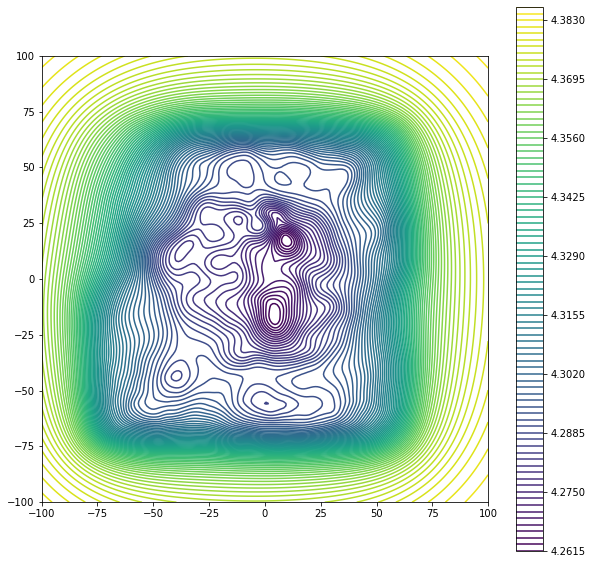

In [162]:

Z=(G*m_sol*kappa/(c*c*10**21)).reshape(len(x),len(y))

fig, ax = plt.subplots(figsize=(10, 10))

im=ax.contour(-Y,X,Z,100,cmap='viridis',shading='auto')
plt.colorbar(im)
ax.set_aspect('equal')